<span class="burk">EJERCICIO</span>

1. Utilice el algoritmo Adaline para clasificar el dataframe iris para los dos tipos de flores trabajados, pero con todas las caracteristicas. Elija el numero de pocas y la taza de aprendizaje que desee.

In [70]:
# Librerias a utilizar
# ===========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [71]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parametros
    ------------
    eta : float
      Rango de aprendizaje (entre 0.0 1 1.0)
    n_iter : int
      Iteracion sobre el datset de entrenamiento completo.
    random_state : int
      Semilla de numeros aleatorios


    Atributos
    -----------
    w_ : 1d-array
      Pesos de las caracteristicas.
    cost_ : list
      Suma de cuadrados de la funcion de costo en cada epoca.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit de datos de entrenamiento.

        Parametros
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        y : array-like, shape = [n_samples]

        Returno
        -------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1]) #shape: (filas, columnas)
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X) # m filas, 1 columna
            output = self.activation(net_input) 
            errors = (y - output) # m filas y una columnas
            self.w_[1:] += self.eta * X.T.dot(errors) # n filas y una columna
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcula net input (z)"""
        return np.dot(X, self.w_[1:]) + self.w_[0] # sale un vector de m filas y 1 columna

    def activation(self, X):
        """Calculo de la activacion lineal"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [72]:
datos = pd.read_csv('iris.csv')

# Voy a trabajar con dos categorias unicamente: Iris-setosa e Iris-versicolos
datos = datos[(datos['Name'] == 'Iris-setosa') | (datos['Name'] == 'Iris-versicolor')]
X = datos.iloc[:, :4].values

# A iris-setosa le colocare la categoria 1 y a Iris-versicolor, la categoria -1
y = datos['Name'].values
y = np.where(y == 'Iris-setosa', 1, -1)

In [73]:
modelo1 = AdalineGD(eta = 0.0001, n_iter = 15).fit(X, y)
modelo2 = AdalineGD(eta = 0.00001, n_iter = 15).fit(X, y)

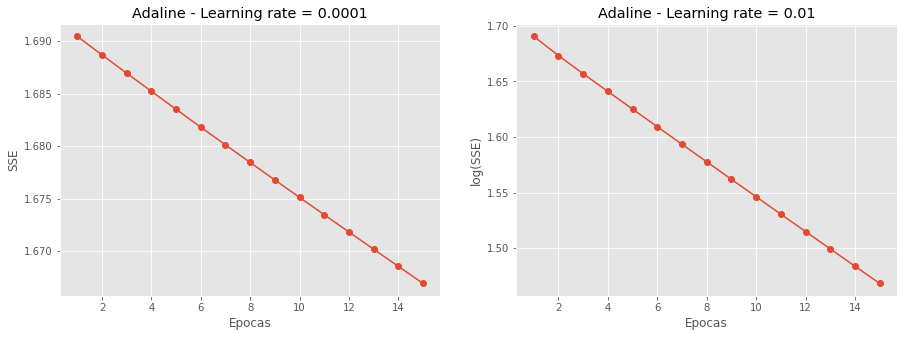

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
x = np.arange(1, 16)
y1 = modelo1.cost_
y2 = modelo2.cost_
ax[1].plot(x, np.log10(y1), marker = 'o')
ax[0].plot(x, np.log10(y2), marker = 'o')
ax[1].set_ylabel('log(SSE)')
ax[1].set_xlabel('Epocas')
ax[0].set_ylabel('SSE')
ax[0].set_xlabel('Epocas')
ax[1].set_title('Adaline - Learning rate = 0.01')
ax[0].set_title('Adaline - Learning rate = 0.0001');

In [75]:
# Caracteristicas normalizadas
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 1] - X[:, 2].mean()) / X[:, 1].std()
X_std[:, 3] = (X[:, 1] - X[:, 3].mean()) / X[:, 1].std()
modelo = AdalineGD(n_iter=15, eta=0.001)
modelo.fit(X_std, y)

In [76]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

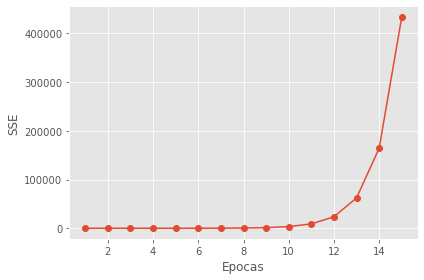

In [77]:
plt.plot(range(1, len(modelo.cost_) + 1), modelo.cost_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('SSE')

plt.tight_layout()
plt.show()

Notar que el SSE no es cero a pesar de que todas las muestras estan correctamente clasificadas.